In [22]:
import pandas as pd
import requests
import json

In [23]:
# . Define a function to fetch movie details from TMDb using movie titles
API_KEY = 'f051bb7b250b395bbcd1bf925b46b413'  

def fetch_movie_details(title):
    """Fetch movie details from TMDb using the movie title."""
    url = f"https://api.themoviedb.org/3/search/movie"
    params = {
        'api_key': API_KEY,
        'query': title,
        'language': 'en-US'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json().get('results')
        return data[0] if data else {}  # Return the first result or an empty dict if not found
    else:
        print(f"Error fetching details for {title}: {response.status_code}")
        return {}


In [24]:
# Load data
ratings_df = pd.read_csv("c:\\Users\\maram\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv")
movies_df = pd.read_csv("c:\\Users\\maram\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv")


Number of records before preprocessing: 100836
Number of records after preprocessing: 100836


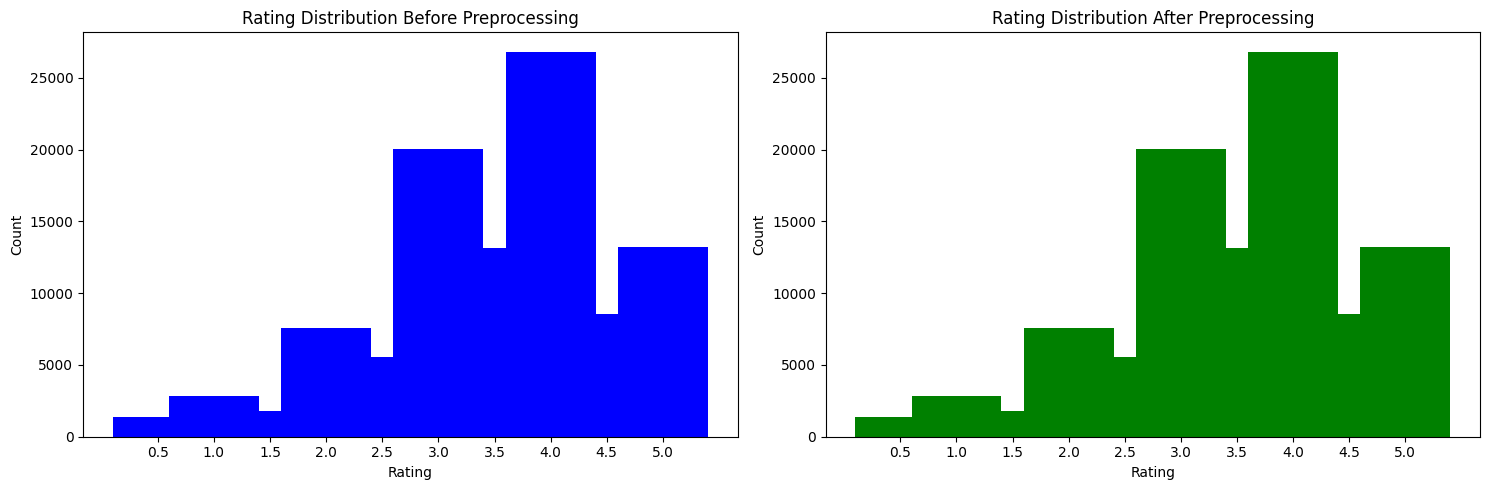

In [25]:
import matplotlib.pyplot as plt

# Load the initial dataset
ratings_df = pd.read_csv("c:\\Users\\maram\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv")

# Display the count of records before preprocessing
print("Number of records before preprocessing:", len(ratings_df))

# Initial rating distribution (before preprocessing)
initial_ratings_count = ratings_df['rating'].value_counts().sort_index()

# Preprocessing: Remove duplicates (if any)
filtered_ratings = ratings_df.drop_duplicates()

# Check if there were any duplicates removed
print("Number of records after preprocessing:", len(filtered_ratings))

# Ensure there is no filtering applied beyond removing duplicates
assert len(ratings_df) == len(filtered_ratings), "Preprocessing altered the record count unexpectedly."

# Rating distribution after preprocessing
processed_ratings_count = filtered_ratings['rating'].value_counts().sort_index()

# Plot side-by-side comparison of the distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot initial rating distribution
axes[0].bar(initial_ratings_count.index, initial_ratings_count.values, color='blue')
axes[0].set_title("Rating Distribution Before Preprocessing")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")
axes[0].set_xticks(initial_ratings_count.index)

# Plot processed rating distribution
axes[1].bar(processed_ratings_count.index, processed_ratings_count.values, color='green')
axes[1].set_title("Rating Distribution After Preprocessing")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")
axes[1].set_xticks(processed_ratings_count.index)

# Show the figure
plt.tight_layout()
plt.show()


In [26]:

# Load the initial dataset
ratings_df2 = pd.read_csv("c:\\Users\\maram\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv")

# Count the number of records before preprocessing
print("Number of records before preprocessing:", len(ratings_df))

# Check for duplicates and remove them
filtered_ratings = ratings_df.drop_duplicates()

# Fill missing values in the 'rating' column with the mean rating for each movie (if any)
filtered_ratings['rating'] = filtered_ratings.groupby('movieId')['rating'].transform(lambda x: x.fillna(x.mean()))

# Count the number of records after preprocessing
print("Number of records after preprocessing:", len(filtered_ratings))


Number of records before preprocessing: 100836
Number of records after preprocessing: 100836


In [27]:

# Count the number of ratings for each movie
movie_ratings_count = ratings_df.groupby('movieId').size().reset_index(name='rating_count')

# Merge with the movies dataframe to get the movie titles
popular_movies = movie_ratings_count.merge(movies_df, on='movieId')

# Sort by the number of ratings in descending order and get the top 3
top_3_popular_movies = popular_movies.sort_values(by='rating_count', ascending=False).head(3)

# Display the top 3 most popular movies
print("Top 3 Most Popular Movies:")
print(top_3_popular_movies[['title', 'rating_count']])


Top 3 Most Popular Movies:
                                title  rating_count
314               Forrest Gump (1994)           329
277  Shawshank Redemption, The (1994)           317
257               Pulp Fiction (1994)           307


C:\Users\maram\AppData\Local\Temp\ipykernel_14904\1544630511.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


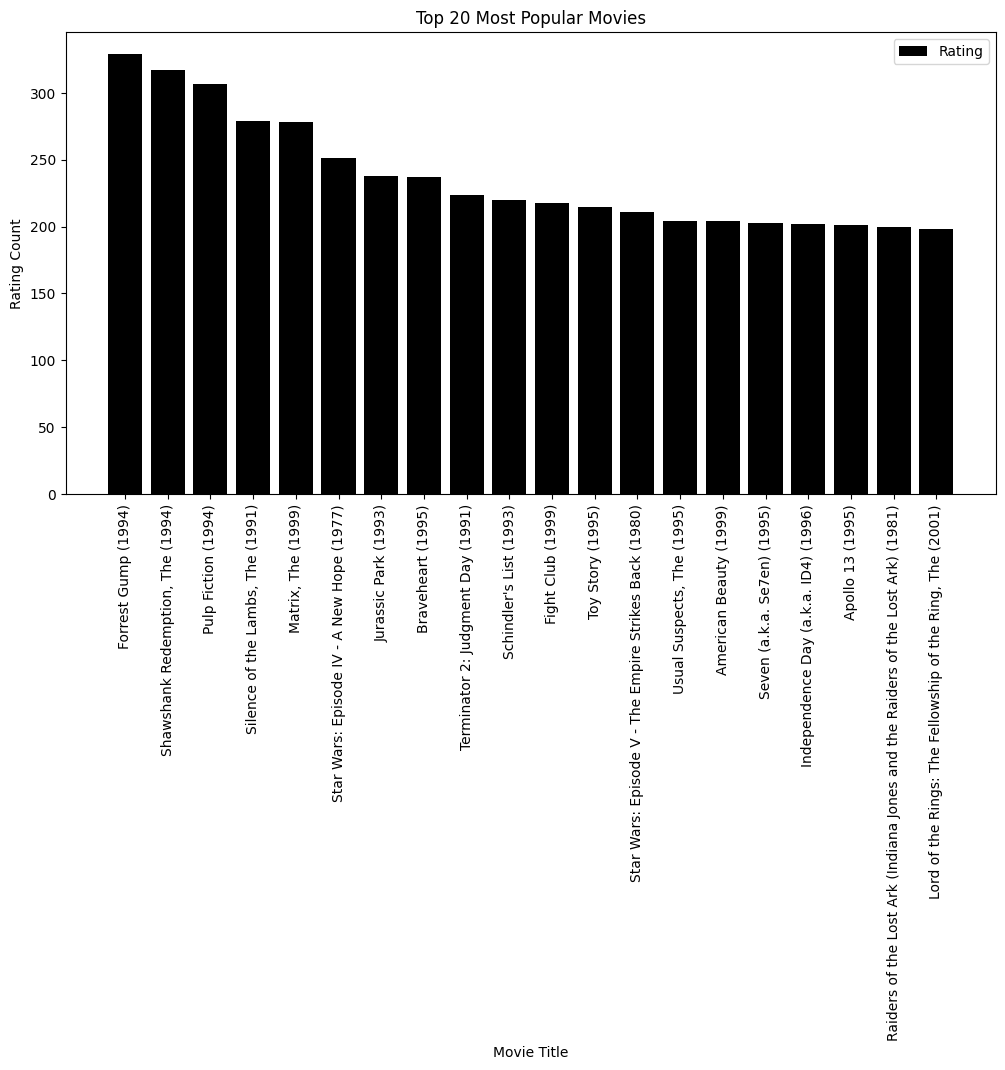

In [28]:


# Sort by the number of ratings in descending order and get the top 20
top_popular_movies = popular_movies.sort_values(by='rating_count', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_popular_movies['title'], top_popular_movies['rating_count'], color='black')
plt.xlabel('Movie Title')
plt.ylabel('Rating Count')
plt.title('Top 20 Most Popular Movies')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(['Rating'])
plt.tight_layout()
plt.show()


In [29]:
# Mapping UserID and MovieID to new standardized format
# Create unique lists for userId and movieId
unique_user_ids = ratings_df['userId'].unique()
unique_movie_ids = ratings_df['movieId'].unique()

# Create mappings
user_id_map = {old_id: f"U{idx + 1}" for idx, old_id in enumerate(unique_user_ids)}
movie_id_map = {old_id: f"M{idx + 1}" for idx, old_id in enumerate(unique_movie_ids)}

# Apply mappings to the dataframe
ratings_df['MappedUserID'] = ratings_df['userId'].map(user_id_map)
ratings_df['MappedMovieID'] = ratings_df['movieId'].map(movie_id_map)

# Display the first few rows to verify
print("Mapped Data Sample:")
print(ratings_df[['userId', 'MappedUserID', 'movieId', 'MappedMovieID']].head())

# Optional: Save to a new CSV file for easy reference
ratings_df.to_csv("mapped_ratings.csv", index=False)

Mapped Data Sample:
   userId MappedUserID  movieId MappedMovieID
0       1           U1        1            M1
1       1           U1        3            M2
2       1           U1        6            M3
3       1           U1       47            M4
4       1           U1       50            M5


In [30]:
# Display initial data (before preprocessing)
print("Initial Movies Data:")
print(movies_df.head())
print("\nInitial Ratings Data:")
print(ratings_df.head())

Initial Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Initial Ratings Data:
   userId  movieId  rating  timestamp MappedUserID MappedMovieID
0       1        1     4.0  964982703           U1            M1
1       1        3     4.0  964981247           U1            M2
2       1        6     4.0  964982224           U1            M3
3       1       47     5.0  964983815           U1            M4
4       1       50     5.0  96498293

In [31]:
# 3. Preprocessing: Handle missing values and duplicates
# Check for duplicates and missing values before preprocessing
print("\nBefore Preprocessing:")
print(f"Duplicates: {filtered_ratings.duplicated().sum()}")
print(f"Missing Values:\n{filtered_ratings.isnull().sum()}")
# Drop duplicates
filtered_ratings.drop_duplicates(inplace=True)

# Fill missing values in 'rating' column with the mean rating for each movie (if any)
filtered_ratings['rating'].fillna(filtered_ratings.groupby('movieId')['rating'].transform('mean'), inplace=True)

# Check for duplicates and missing values after preprocessing
print("\nAfter Preprocessing:")
print(f"Duplicates: {filtered_ratings.duplicated().sum()}")
print(f"Missing Values:\n{filtered_ratings.isnull().sum()}")



Before Preprocessing:
Duplicates: 0
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

After Preprocessing:
Duplicates: 0
Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


C:\Users\maram\AppData\Local\Temp\ipykernel_14904\718178561.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ratings['rating'].fillna(filtered_ratings.groupby('movieId')['rating'].transform('mean'), inplace=True)


In [32]:
# 2. Filter users who have rated the same 4 movies
# Count number of ratings per movie
movie_ratings_count = ratings_df['movieId'].value_counts()
common_movies = movie_ratings_count[movie_ratings_count >= 4].index.tolist()[:4]  # Get at least 4 movies rated by 4 users

In [33]:
# Filter ratings for these common movies
filtered_ratings = ratings_df[ratings_df['movieId'].isin(common_movies)]

In [34]:
# Count number of movies rated by each user
user_ratings_count = filtered_ratings['userId'].value_counts()
common_users = user_ratings_count[user_ratings_count >= 4].index.tolist()[:4]  # Get at least 4 users

In [35]:
# Filter ratings for these common users
filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(common_users)]
print("\nFiltered Ratings Data (Users who rated the same 4 movies):")
print(filtered_ratings)


Filtered Ratings Data (Users who rated the same 4 movies):
       userId  movieId  rating   timestamp MappedUserID MappedMovieID
36182     247      296     4.0  1467644035         U247           M17
36183     247      318     4.5  1467643895         U247          M233
36184     247      356     5.0  1467644091         U247           M21
36190     247      593     4.0  1467644099         U247           M35
36398     249      296     4.0  1346757687         U249           M17
36399     249      318     4.5  1346758076         U249          M233
36401     249      356     4.5  1346841583         U249           M21
36421     249      593     4.0  1346758020         U249           M35
43505     292      296     3.0   990062598         U292           M17
43506     292      318     5.0   990062572         U292          M233
43509     292      356     4.5  1219624965         U292           M21
43529     292      593     3.0  1293562311         U292           M35
48632     314      296     1.0

In [36]:
# . Create User-Item Matrix for the filtered users and movies
user_item_matrix = filtered_ratings.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
print("\nUser-Item Matrix:")
print(user_item_matrix)


User-Item Matrix:
movieId  296  318  356  593
userId                     
247      4.0  4.5  5.0  4.0
249      4.0  4.5  4.5  4.0
292      3.0  5.0  4.5  3.0
314      1.0  5.0  4.0  3.0


In [37]:
# Calculate average ratings
average_ratings = ratings_df.groupby('movieId')['rating'].mean()

# Merge average ratings with the movies dataframe
movies_df = movies_df.merge(average_ratings, on='movieId', how='left')
print(movies_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930  
1                   Adventure|Children|Fantasy  3.431818  
2                               Comedy|Romance  3.259615  
3                         Comedy|Drama|Romance  2.357143  
4                                       Comedy  3.071429  


In [38]:
pip install matplotlib


In [39]:
import pandas as pd

# Load the initial dataset
ratings_df2 = pd.read_csv("c:\\Users\\maram\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv")

# Count the number of records before preprocessing
print("Number of records before preprocessing:", len(ratings_df))

# Check for duplicates and remove them
filtered_ratings = ratings_df.drop_duplicates()

# Fill missing values in the 'rating' column with the mean rating for each movie (if any)
filtered_ratings['rating'] = filtered_ratings.groupby('movieId')['rating'].transform(lambda x: x.fillna(x.mean()))

# Count the number of records after preprocessing
print("Number of records after preprocessing:", len(filtered_ratings))


Number of records before preprocessing: 100836


Number of records after preprocessing: 100836
